Building a SimpleRNN Model for Weather Temperature Prediction
Objective
The goal of this assignment is to design, implement, and evaluate a Recurrent Neural Network
(RNN) model (using SimpleRNN) to forecast the next day’s temperature based on past weather
data.

Dataset
Use the Daily Weather Dataset
● Example: Daily Weather Dataset – Kaggle
● Key Features:
○ Date
○ Temperature (target variable)
○ Humidity
○ Wind Speed
○ Pressure (optional)

Tasks
Part A: Data Understanding and Preprocessing
1. Load the dataset and explore:
○ Display first 10 rows.
○ Plot temperature trends over time.
○ Check for missing values.

2. Preprocess the data:
○ Handle missing values (impute/remove).
○ Normalize values using MinMaxScaler (so RNN converges faster).
○ Create input sequences:
■ Use past 7–14 days’ weather data (temperature, humidity, wind speed)
as input.
■ Target: next day’s temperature.
○ Split dataset into train, validation, and test sets.

Part B: RNN Model Development
3. Build a SimpleRNN model using TensorFlow/Keras:
○ Input layer (with shape = sequence length × number of features).
○ SimpleRNN layer (e.g., 32–64 units).
○ Dropout layer (optional, to avoid overfitting).
○ Dense layer with 1 unit (linear activation for regression).
4. Compile the model:
○ Loss: Mean Squared Error (MSE).
○ Optimizer: Adam.
○ Metrics: Mean Absolute Error (MAE).
5. Train the model on training data:
○ Batch size: 32
○ Epochs: 50–100

○ Use validation data to monitor performance.
○ Plot training vs validation loss curves.

Part C: Model Evaluation & Forecasting
6. Evaluate the model on the test set:
○ Calculate RMSE, MAE, and R2 score.
○ Plot predicted vs actual temperatures for the test period.
7. Forecast the next 7 days of temperature using the trained model and visualize
predictions vs recent historical data.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muthuj7/weather-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weather-dataset' dataset.
Path to dataset files: /kaggle/input/weather-dataset


In [29]:
print(path)

/kaggle/input/weather-dataset


In [30]:
import os

# Construct the full path to the CSV file with the correct filename
csv_file_path = os.path.join(path, 'weatherHistory.csv')

# Load the dataset
df = pd.read_csv(csv_file_path)

# Display the first 10 rows as per the task requirements
display(df.head(10))

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


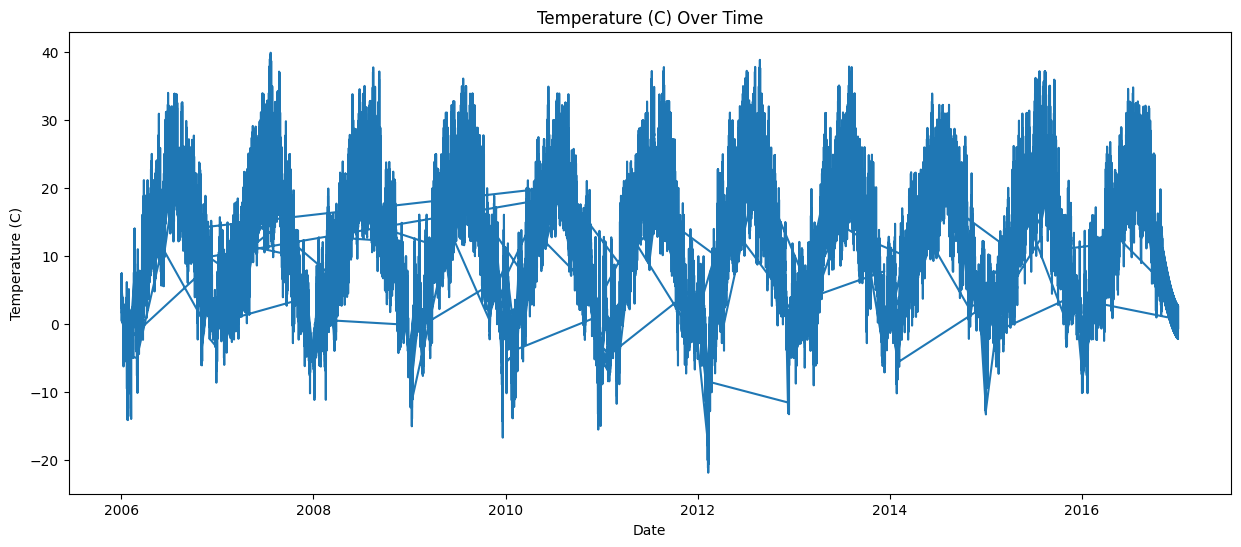

In [32]:

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index('Formatted Date')

plt.figure(figsize=(15, 6))
plt.plot(df['Temperature (C)'])
plt.title('Temperature (C) Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()


In [37]:
#Check for missing values
df.isnull().sum()
#Precip type is missing

,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure (millibars),0


# Preprocess the data


In [36]:
#Handle missing values (impute/remove)
df.dropna(inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95936 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Loud Cover                95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
 10  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [42]:
#Normalize values using MinMaxScaler
Final_df=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(Final_df)
Final_df = pd.DataFrame(df_scaled, columns=Final_df.columns)
Final_df


,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,0.506975,0.89,0.221130,0.970135
1,0.505085,0.86,0.223399,0.970613
2,0.505445,0.89,0.061523,0.970909
3,0.487805,0.83,0.220877,0.971358
4,0.495365,0.83,0.172970,0.971454
...,...,...,...,...
95931,0.774998,0.43,0.172214,0.969399
95932,0.751778,0.48,0.158094,0.970164
95933,0.710557,0.56,0.140696,0.970642
95934,0.702187,0.60,0.164902,0.970919


In [43]:
#○ Create input sequences: ■ Use past 7–14 days’ weather data (temperature, humidity, wind speed) as input.
#  ■ Target: next day’s temperature.
#   ○ Split dataset into train, validation, and test sets.
def create_sequences(X, y, window_size=7):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)
features=Final_df.drop('Temperature (C)',axis=1)
target=Final_df['Temperature (C)']
X_seq, y_seq = create_sequences(features, target, window_size=7)


In [44]:
#Splitting
train_size = int(0.7 * len(X_seq))
val_size = int(0.85 * len(X_seq))

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:val_size], y_seq[train_size:val_size]
X_test, y_test = X_seq[val_size:], y_seq[val_size:]


In [ ]:
#Part B: RNN Model Development 3. Build a SimpleRNN model using TensorFlow/Keras:
#○ Input layer (with shape = sequence length × number of features).
#○ SimpleRNN layer (e.g., 32–64 units).
#○ Dropout layer (optional, to avoid overfitting).
#○ Dense layer with 1 unit (linear activation for regression).
#4. Compile the model: ○ Loss: Mean Squared Error (MSE). ○ Optimizer: Adam. ○ Metrics: Mean Absolute Error (MAE).
#5. Train the model on training data: ○ Batch size: 32 ○ Epochs: 50–100

In [45]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mae']
)


In [51]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)



Epoch 1/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0117 - mae: 0.0865 - val_loss: 0.0112 - val_mae: 0.0850
Epoch 2/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0116 - mae: 0.0860 - val_loss: 0.0087 - val_mae: 0.0741
Epoch 3/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0117 - mae: 0.0866 - val_loss: 0.0099 - val_mae: 0.0789
Epoch 4/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0117 - mae: 0.0866 - val_loss: 0.0088 - val_mae: 0.0737
Epoch 5/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0117 - mae: 0.0863 - val_loss: 0.0094 - val_mae: 0.0775
Epoch 6/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0115 - mae: 0.0856 - val_loss: 0.0096 - val_mae: 0.0769
Epoch 7/50
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0115 - mae: 0.0855 - val_loss: 0.0131 - val_mae: 0.0931


In [52]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


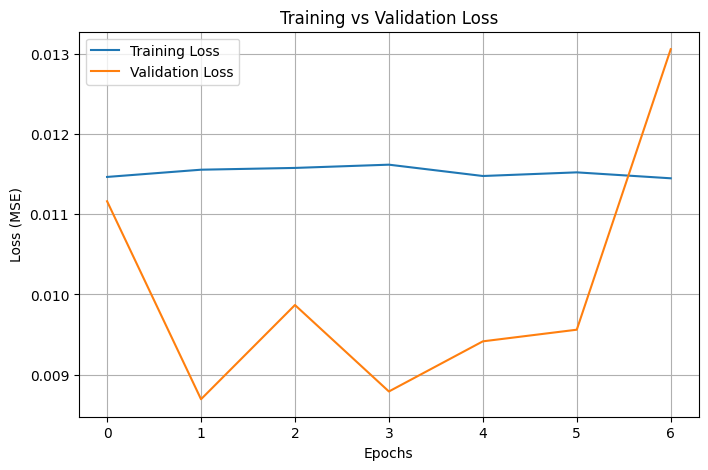

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Checked with and without earlystopping.The validation and training is fluctuating..so saved the weights of the model without going for overfitting or more training time

In [ ]:
#Part C: Model Evaluation & Forecasting
# 6. Evaluate the model on the test set:
# ○ Calculate RMSE, MAE, and R2 score.
# ○ Plot predicted vs actual temperatures for the test period.
# 7. Forecast the next 7 days of temperature using the trained model and visualize predictions vs recent historical data.

In [54]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 0.10160519333495811
MAE : 0.08462881329738936
R2  : 0.5237544001503953


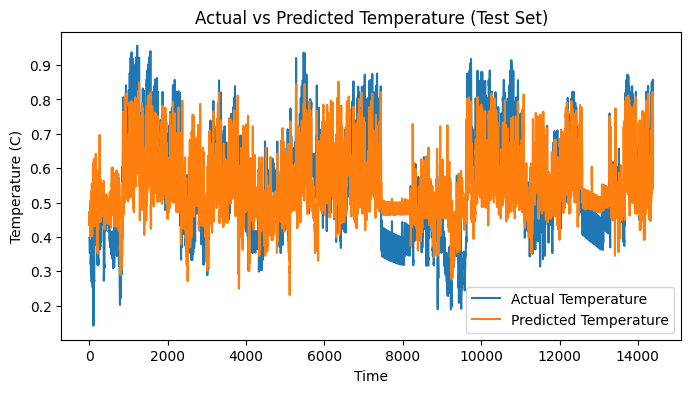

In [55]:

plt.figure(figsize=(8,4))
plt.plot(y_test, label="Actual Temperature")
plt.plot(y_pred, label="Predicted Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.title("Actual vs Predicted Temperature (Test Set)")
plt.legend()
plt.show()


In [56]:
future_predictions = []
current_input = X_seq[-1]

for i in range(7):
    pred = model.predict(current_input.reshape(1, 7, 3))[0][0]
    future_predictions.append(pred)

    new_day = current_input[-1].copy()
    new_day[0] = pred
    current_input = np.append(current_input[1:], [new_day], axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


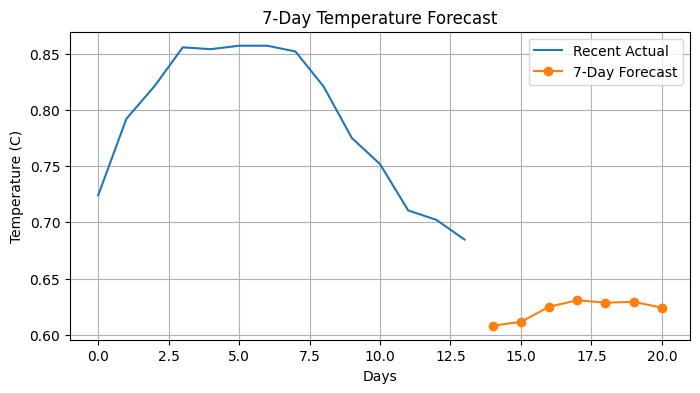

In [57]:
recent_actual = target[-14:]

plt.figure(figsize=(8,4))
plt.plot(range(14), recent_actual, label="Recent Actual")
plt.plot(range(14, 21), future_predictions, marker='o', label="7-Day Forecast")
plt.xlabel("Days")
plt.ylabel("Temperature (C)")
plt.title("7-Day Temperature Forecast")
plt.legend()
plt.grid(True)
plt.show()


the recent last 7 days is started to lean down..so the future predicts in that way only